<a href="https://colab.research.google.com/github/GSP31/GSP31/blob/main/P222A034_end_term.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.naive_bayes import MultinomialNB
from sklearn. ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from textblob import TextBlob, Word
import matplotlib.pyplot as plt
from nltk.stem.snowball import SnowballStemmer
%matplotlib inline
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# Code to read csv file into colaboratory:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
#STEP-2: Autheticate E-Mail ID

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
#STEP-3: Get File from Drive using file-ID

#2.1 Get the file
data = drive.CreateFile({'id':'1LqSxH2vGxaz7RBXGcFh1RDdm5vUcSYnh'}) # replace the id with id of file you want to access
data.GetContentFile('FashionClothing.xlsx')

## **1. Reading the Dataset**

In [ ]:
data = pd.read_excel("FashionClothing.xlsx")
data.head()

,Index,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [ ]:
data.shape

(23486, 11)

## **2. Checking Null Values and dropping null vectors**

In [ ]:
data.isnull().sum()

Index                         0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [ ]:
###Drop Nan Values
data=data.dropna()

In [ ]:
data.head()

,Index,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
5,5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
6,6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits


## **3.Cleaning the Text Data**

In [ ]:
err1 = data['Review Text'].str.extractall("(&amp)")
err2 = data['Review Text'].str.extractall("(\xa0)")

In [ ]:
print('with &amp',len(err1[~err1.isna()]))
print('with (\xa0)',len(err2[~err2.isna()]))

with &amp 37
with ( ) 6


In [ ]:
data['Review Text'] = data['Review Text'].str.replace('(&amp)','')
data['Review Text'] = data['Review Text'].str.replace('(\xa0)','')

# **Q1.**

## **4.EDA**

In [ ]:
import plotly.express as px
import seaborn as sns

<Axes: xlabel='Division Name', ylabel='count'>

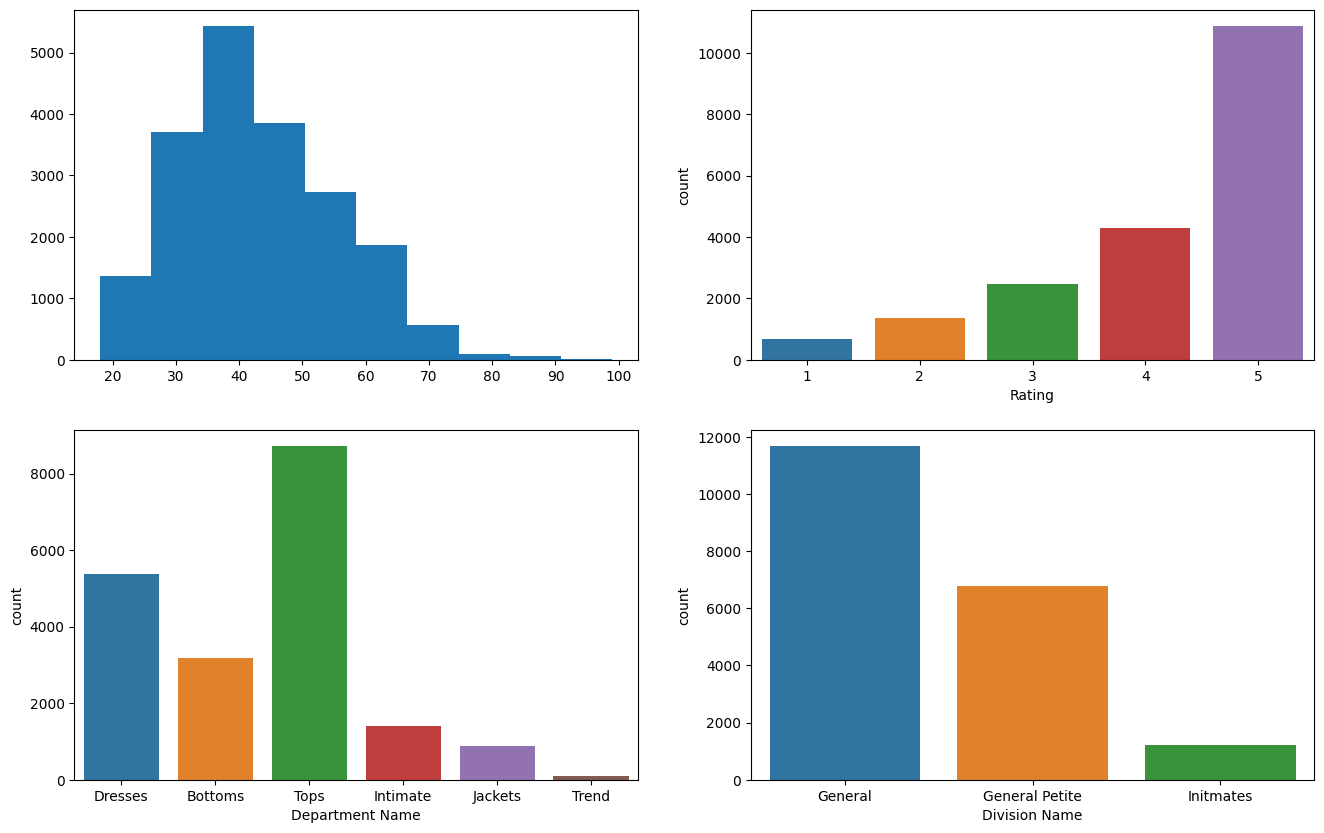

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes[0, 0].hist(data['Age'])
sns.countplot(x='Rating', data=data, ax=axes[0, 1])
sns.countplot(x='Department Name', data=data, ax=axes[1, 0])
sns.countplot(x='Division Name', data=data, ax=axes[1, 1])

In [ ]:
data.isnull().sum()

Index                      0
Clothing ID                0
Age                        0
Title                      0
Review Text                0
Rating                     0
Recommended IND            0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19662 entries, 2 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Index                    19662 non-null  int64 
 1   Clothing ID              19662 non-null  int64 
 2   Age                      19662 non-null  int64 
 3   Title                    19662 non-null  object
 4   Review Text              19662 non-null  object
 5   Rating                   19662 non-null  int64 
 6   Recommended IND          19662 non-null  int64 
 7   Positive Feedback Count  19662 non-null  int64 
 8   Division Name            19662 non-null  object
 9   Department Name          19662 non-null  object
 10  Class Name               19662 non-null  object
dtypes: int64(6), object(5)
memory usage: 1.8+ MB


## **5.Top 5 Reviews and Sentiments**

In [ ]:
import pandas as pd
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer

# Add a 'polarity' column to the dataset
data['polarity'] = data['Review Text'].map(lambda text: TextBlob(text).sentiment.polarity)

# Sort the dataset by polarity in descending order
sorted_data = data.sort_values(by='polarity', ascending=False)

# Display the top 5 reviews with their polarities in a dataframe
top_5_reviews = sorted_data[['Review Text', 'polarity']].head(5)
print(top_5_reviews)

                                             Review Text  polarity
18034                    Made my wedding outfit perfect!       1.0
1236   If there ever was the perfect feminine dress, ...       1.0
16579  I've been looking for an off the should sweate...       1.0
14520  This is so flowing and perfect to hide any fla...       1.0
10277  My daughter had one and wore it with everythin...       1.0


In [ ]:
# Defining a function to extract top n unigrams and bigrams
def top_n_ngram(corpus, n=None, ngram=1):
    vec = CountVectorizer(stop_words='english', ngram_range=(ngram, ngram)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return [word for word, _ in words_freq[:n]]

# top 5 unigrams and bigrams and their associated polarities
top_unigrams = top_n_ngram(data['Review Text'], 5, 1)
top_bigrams = top_n_ngram(data['Review Text'], 5, 2)

# Compute the average polarity of reviews containing each ngram
unigram_polarities = {}
for unigram in top_unigrams:
    unigram_polarities[unigram] = data[data['Review Text'].str.contains(unigram)]['polarity'].mean()

bigram_polarities = {}
for bigram in top_bigrams:
    bigram_polarities[bigram] = data[data['Review Text'].str.contains(bigram)]['polarity'].mean()

# Display the results
print("Top 5 unigrams:")
for unigram in top_unigrams:
    print(f"{unigram}: {unigram_polarities[unigram]:.2f}")

print("\n")

print("Top 5 bigrams:")
for bigram in top_bigrams:
    print(f"{bigram}: {bigram_polarities[bigram]:.2f}")

Top 5 unigrams:
dress: 0.25
size: 0.22
love: 0.27
fit: 0.26
like: 0.21


Top 5 bigrams:
true size: 0.20
_x000d_ _x000d_: nan
love dress: 0.27
usually wear: 0.16
fit perfectly: 0.31


# **Q2.**

In [ ]:
# Add a new column to indicate whether each review is "good" or "bad"
data['review_type'] = data['Rating'].apply(lambda rating: 'good' if rating > 3 else 'bad')

# Display the first few rows of the updated dataset
data.head()

,Index,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,polarity,review_type
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,0.073675,bad
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,0.550000,good
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,0.512891,good
5,5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses,0.178750,bad
6,6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits,0.133750,good


In [ ]:
## Defining X dependent and Y independent features

X=data['Review Text']
y=data['Recommended IND']

In [ ]:
# split the new DataFrame into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [ ]:
# use CountVectorizer to create document-term matrices from X_train and X_test
vect = CountVectorizer(lowercase=True,stop_words='english')
X_train_dtm = vect.fit_transform(X_train)
X_train_dtm.shape

(14746, 11830)

In [ ]:
X_test_dtm=vect.transform(X_test)

In [ ]:
from sklearn.naive_bayes import BernoulliNB
classifier = BernoulliNB()

In [ ]:
def tokenize_test(vect):
  X_train_dtm=vect.fit_transform(X_train)
  print('Features:',X_train_dtm.shape[1])
  X_test_dtm=vect.transform(X_test)
  nb1=MultinomialNB()
  nb2=BernoulliNB()
  lr=LogisticRegression()
  lr.fit(X_train_dtm,y_train)
  nb1.fit(X_train_dtm,y_train)
  nb2.fit(X_train_dtm,y_train)
  y_pred_class_lr=lr.predict(X_test_dtm)
  print('Accuracy for logistic Regression:',metrics.accuracy_score(y_test,y_pred_class_lr))
  print('Confusion Matrix for logistic Regression:',confusion_matrix(y_test, y_pred_class_lr))
  auc_score = roc_auc_score(y_test, y_pred_class_lr)
  print('AUC Score of logistic Regression : {:.3f}'.format(auc_score))
  fpr, tpr, thresholds = roc_curve(y_test, y_pred_class_lr)
  plt.plot(fpr, tpr, label='Logistic Regression (AUC = {:.3f})'.format(auc_score))
  plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic')
  plt.legend(loc='lower right')
  plt.show()
  y_pred_class_nb=nb1.predict(X_test_dtm)
  print('Accuracy for Multinomial NB:',metrics.accuracy_score(y_test,y_pred_class_nb))
  print('Confusion Matrix for Multinomial NB:',confusion_matrix(y_test, y_pred_class_nb))
  auc_score = roc_auc_score(y_test, y_pred_class_nb)
  print('AUC Score of Multinomial NB : {:.3f}'.format(auc_score))
  fpr, tpr, thresholds = roc_curve(y_test, y_pred_class_nb)
  plt.plot(fpr, tpr, label='Multinomial NB (AUC = {:.3f})'.format(auc_score))
  plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic')
  plt.legend(loc='lower right')
  plt.show()
  y_pred_class_nb=nb2.predict(X_test_dtm)
  print('Accuracy for BernoulliNB:',metrics.accuracy_score(y_test,y_pred_class_nb))
  print('Confusion Matrix for BernoulliNB:',confusion_matrix(y_test, y_pred_class_nb))
  auc_score = roc_auc_score(y_test, y_pred_class_nb)
  print('AUC Score of BernoulliNB: {:.3f}'.format(auc_score))
  fpr, tpr, thresholds = roc_curve(y_test, y_pred_class_nb)
  plt.plot(fpr, tpr, label='BernoulliNB (AUC = {:.3f})'.format(auc_score))
  plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic')
  plt.legend(loc='lower right')
  plt.show()




Features: 186598
Accuracy for logistic Regression: 0.8903580146460537
Confusion Matrix for logistic Regression: [[ 561  347]
 [ 192 3816]]
AUC Score of logistic Regression : 0.785


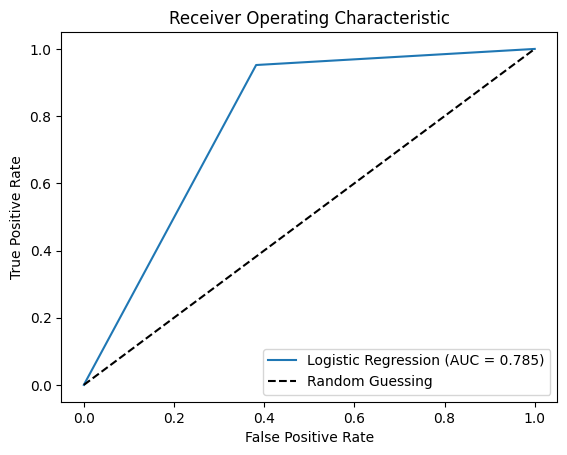

Accuracy for Multinomial NB: 0.8557770545158666
Confusion Matrix for Multinomial NB: [[ 247  661]
 [  48 3960]]
AUC Score of Multinomial NB : 0.630


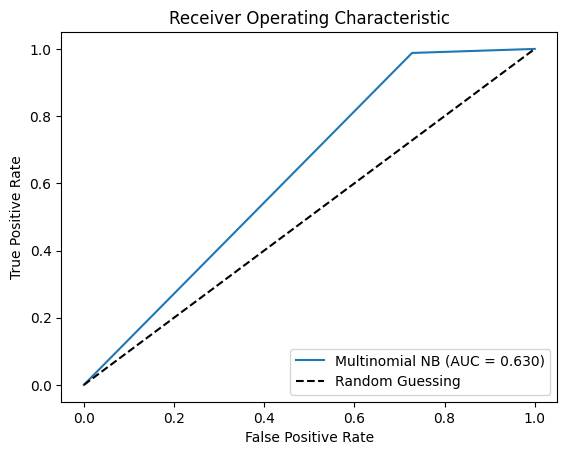

Accuracy for BernoulliNB: 0.8248576078112286
Confusion Matrix for BernoulliNB: [[  52  856]
 [   5 4003]]
AUC Score of BernoulliNB: 0.528


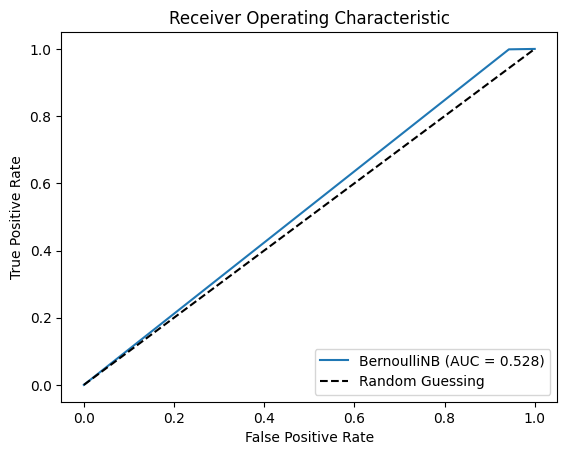

In [ ]:
vect=CountVectorizer(ngram_range=(1,2))
tokenize_test(vect)

Features: 12113
Accuracy for logistic Regression: 0.8779495524816925
Confusion Matrix for logistic Regression: [[ 551  357]
 [ 243 3765]]
AUC Score of logistic Regression : 0.773


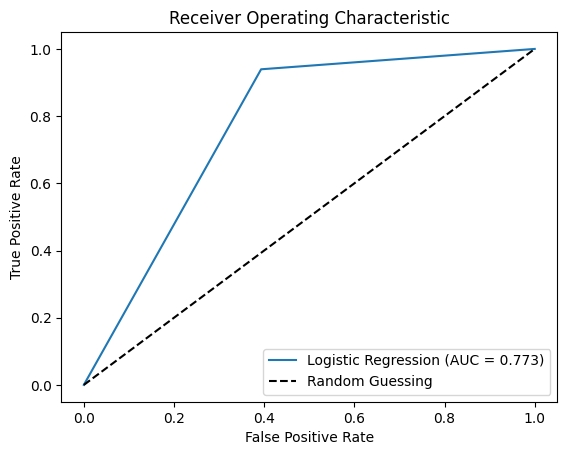

Accuracy for Multinomial NB: 0.8840520748576078
Confusion Matrix for Multinomial NB: [[ 619  289]
 [ 281 3727]]
AUC Score of Multinomial NB : 0.806


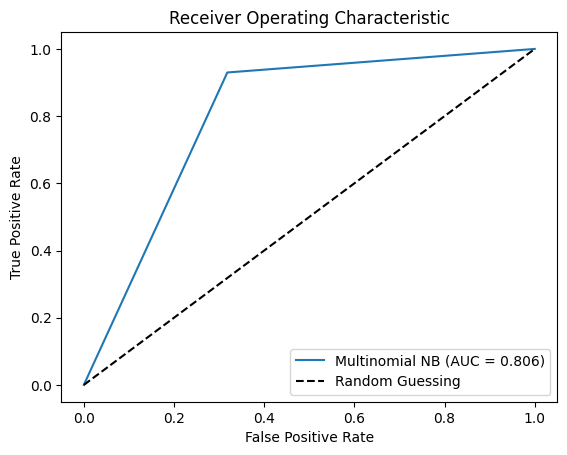

Accuracy for BernoulliNB: 0.8755085435313262
Confusion Matrix for BernoulliNB: [[ 574  334]
 [ 278 3730]]
AUC Score of BernoulliNB: 0.781


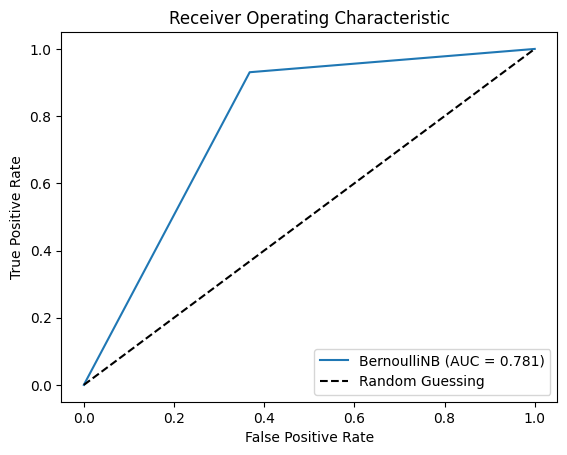

In [ ]:
vect=CountVectorizer(ngram_range=(1,1))
tokenize_test(vect)

**Such that we can see that the mutinomial and bernouli nb accuracy is better for unigram. However for logistic regression the accuracy of bigram is more i.e. ~90% compared to that of the  unigram model which is ~88%**

# **Q3.**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19662 entries, 2 to 23485
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Index                    19662 non-null  int64  
 1   Clothing ID              19662 non-null  int64  
 2   Age                      19662 non-null  int64  
 3   Title                    19662 non-null  object 
 4   Review Text              19662 non-null  object 
 5   Rating                   19662 non-null  int64  
 6   Recommended IND          19662 non-null  int64  
 7   Positive Feedback Count  19662 non-null  int64  
 8   Division Name            19662 non-null  object 
 9   Department Name          19662 non-null  object 
 10  Class Name               19662 non-null  object 
 11  polarity                 19662 non-null  float64
 12  review_type              19662 non-null  object 
dtypes: float64(1), int64(6), object(6)
memory usage: 2.1+ MB


## **Defining different X and Y variable**

In [ ]:
## Defining X dependent and Y independent features

X=data[['Review Text', 'Class Name']]
y=data['Recommended IND']

In [ ]:
### Vocabulary size
voc_size=1000

In [ ]:
messages=X.copy()

In [ ]:
messages.reset_index(inplace=True)

In [ ]:
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
### Dataset Preprocessing

ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['Review Text'][i])
    review = review.lower()
    review = review.split()

    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [ ]:
corpus[1]

'love love love jumpsuit fun flirti fabul everi time wear get noth great compliment'

In [ ]:
from tensorflow.keras.preprocessing.text import one_hot

In [ ]:
onehot_repr=[one_hot(words,voc_size)for words in corpus]
onehot_repr

[[330,
  259,
  952,
  28,
  785,
  835,
  314,
  946,
  575,
  597,
  761,
  785,
  925,
  385,
  597,
  597,
  805,
  798,
  812,
  978,
  575,
  438,
  601,
  473,
  915,
  24,
  923,
  445,
  31,
  944,
  24,
  353,
  610,
  161,
  185,
  678,
  522,
  610,
  362,
  264,
  476,
  645,
  522,
  610,
  214,
  969,
  312,
  606],
 [683, 683, 683, 715, 217, 248, 608, 697, 455, 840, 864, 29, 578, 710],
 [848, 13, 742, 82, 952, 491, 636, 777, 840, 465, 318, 596, 494, 2, 683, 848],
 [683,
  640,
  92,
  952,
  805,
  575,
  425,
  396,
  761,
  840,
  436,
  880,
  952,
  301,
  737,
  148,
  952,
  250,
  957,
  734,
  724,
  597,
  523,
  543,
  30,
  468,
  405,
  250,
  987,
  914,
  133,
  906,
  268,
  683,
  870,
  915,
  821,
  835,
  469,
  952],
 [835,
  113,
  205,
  655,
  655,
  448,
  987,
  209,
  723,
  105,
  309,
  390,
  681,
  898,
  97,
  870,
  650,
  205,
  870,
  28,
  390,
  484,
  920,
  32,
  242,
  623,
  330,
  907,
  205,
  267,
  205,
  178,
  785,
  76,
  5

In [ ]:
corpus[1]

'love love love jumpsuit fun flirti fabul everi time wear get noth great compliment'

In [ ]:
onehot_repr[1]

[683, 683, 683, 715, 217, 248, 608, 697, 455, 840, 864, 29, 578, 710]

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
sent_length=80
embedded_docs=pad_sequences(onehot_repr,padding='post',maxlen=sent_length)
print(embedded_docs)

[[330 259 952 ...   0   0   0]
 [683 683 683 ...   0   0   0]
 [848  13 742 ...   0   0   0]
 ...
 [445 494 915 ...   0   0   0]
 [935 952 193 ...   0   0   0]
 [952 683 745 ...   0   0   0]]


In [ ]:
embedded_docs[1]

array([683, 683, 683, 715, 217, 248, 608, 697, 455, 840, 864,  29, 578,
       710,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0], dtype=int32)

In [ ]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

In [ ]:
## Creating model
embedding_vector_features=100 ##features representation
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(LSTM(100))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 80, 100)           100000    
                                                                 
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 180,501
Trainable params: 180,501
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
X_final=np.array(embedded_docs)
y_final=np.array(y)

In [ ]:
X_final.shape,y_final.shape

((19662, 80), (19662,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=42)

In [ ]:
### Finally Training
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
206/206 [==============================] - 42s 193ms/step - loss: 0.4777 - accuracy: 0.8189 - val_loss: 0.4870 - val_accuracy: 0.8106
Epoch 2/10
206/206 [==============================] - 39s 192ms/step - loss: 0.4696 - accuracy: 0.8219 - val_loss: 0.4855 - val_accuracy: 0.8106
Epoch 3/10
206/206 [==============================] - 35s 171ms/step - loss: 0.4694 - accuracy: 0.8219 - val_loss: 0.4878 - val_accuracy: 0.8106
Epoch 4/10
206/206 [==============================] - 35s 170ms/step - loss: 0.4693 - accuracy: 0.8219 - val_loss: 0.4856 - val_accuracy: 0.8106
Epoch 5/10
206/206 [==============================] - 34s 165ms/step - loss: 0.4689 - accuracy: 0.8219 - val_loss: 0.4855 - val_accuracy: 0.8106
Epoch 6/10
206/206 [==============================] - 35s 172ms/step - loss: 0.4695 - accuracy: 0.8219 - val_loss: 0.4902 - val_accuracy: 0.8106
Epoch 7/10
206/206 [==============================] - 36s 175ms/step - loss: 0.4690 - accuracy: 0.8219 - val_loss: 0.4879 - val_ac

In [ ]:
y_pred=model.predict(X_test)
y_pred=np.where(y_pred > 0.6, 1,0) ##AUC ROC Curve
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

203/203 [==============================] - 5s 22ms/step


0.8106025581753737

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1229
           1       0.81      1.00      0.90      5260

    accuracy                           0.81      6489
   macro avg       0.41      0.50      0.45      6489
weighted avg       0.66      0.81      0.73      6489

